In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Example 1
In 2011, URL shortening service bit.ly partnered with the United States government website usa.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil. As of this writing, in addition to providing a live feed, hourly snapshots are available as downloadable text files.

In [4]:
path ='Datasets/usagov_bitly_data2012-03-16-1331923249.txt'


In [5]:
#first line
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [8]:
#convert JSON string into a python library
import json
records = [json.loads(line)for line in open(path)]

The last expression is called a *list comprehenssion*, which is a concise way of applying an operation line (json.loads) to a collection of strings rather objects.<br>
Convinently, iterating over an open file handle gives you a sequence of its lines. The resulting object is now a list of Python dictionaries

In [10]:
#Viewing the first record
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [11]:
# Accessing individual values within the records by passing the key you wish to access
records[0]['tz']

'America/New_York'

#### Counting Time Zones with Python

In [93]:
# Find the most-occuring timesone in the dataset (the tz field)

# Extract the list of timezones
timezones =[rec['tz'] for rec in records if 'tz' in rec]

In [94]:
# Display first 10 timezones
timezones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Observation:<br>
Some of them are empty

In [95]:
# Count function

#Use a dictionary to store counts while iterating through the timezones

def get_counts(sequence):
    counts ={}     #empty dictionary
    
    for x in sequence:
        if x in counts:
            counts[x] +=1
        else:
            counts[x] =1
    return counts

Code explanation:<br>
- Iterate over each element 'x' in the input 'sequence'<br>
- For each element in 'x' check if its already a key in the 'counts' dictionary:<br>
        if it is, increment the value assosiated with 'x' by 1 <br>
        if its not, add 'x' as a key to the 'counts' dictionary with a value of 1.

In [96]:
# Count the timezones

timezone_counts = get_counts(timezones)

timezone_counts

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [97]:
timezone_counts['America/New_York']

1251

In [98]:
len(timezones)

3440

In [99]:
# Top 10 timezones and their counts function

def top_counts(count_dict, n=10):
    value_key_pairs = [(count,tz) for tz, count in count_dict.items()]
    value_key_pairs.sort(reverse = True) #sort in descending order
    return value_key_pairs[:n]           #top n items

Explanation: <br>
The function takes in two parameters:<br>
- 'count_dict' - which is a dictionary where keys are timezones and values are their corresponding counts.<br>
- 'n' is the number of top ten items to return (default is 10) <br>

'value_key_pairs' - a list of tuples, where each tuple contains a count followed by its corresponding timezone. This is done using a list comprehension


In [100]:
# Top 15 timezone counts
top_counts(timezone_counts, n=15)

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo'),
 (28, 'Europe/Berlin'),
 (27, 'Europe/Rome'),
 (25, 'America/Rainy_River'),
 (22, 'Europe/Amsterdam'),
 (20, 'America/Phoenix')]

#### Counting TimeZones with Python

In [101]:
frame =pd.DataFrame(records)

In [102]:
frame.head(2)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN


In [103]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [104]:
frame.shape

(3560, 18)

In [105]:
# First 10 timezones
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [106]:
# Value counts for the first 10timezones
tz_counts =frame['tz'].value_counts()

tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

#### Missing values

In [107]:
missing = frame.isnull().sum()

print(missing[missing>0])

a               120
c               641
nk              120
tz              120
gr              641
g               120
h               120
l               120
al              466
hh              120
r               120
u               120
t               120
hc              120
cy              641
ll              641
_heartbeat_    3440
kw             3467
dtype: int64


In [108]:
# Replace the missing values in the timezone column with the string Missing 
clean_tz =frame['tz'].fillna('Missing')


In [109]:
# Replace the unknown (empty strings) values in  the timezone with the string unknown
clean_tz[clean_tz == ''] = 'Unknown'

In [110]:
tz_counts = clean_tz.value_counts()

tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<Axes: title={'center': ' Top 10 timezones'}>

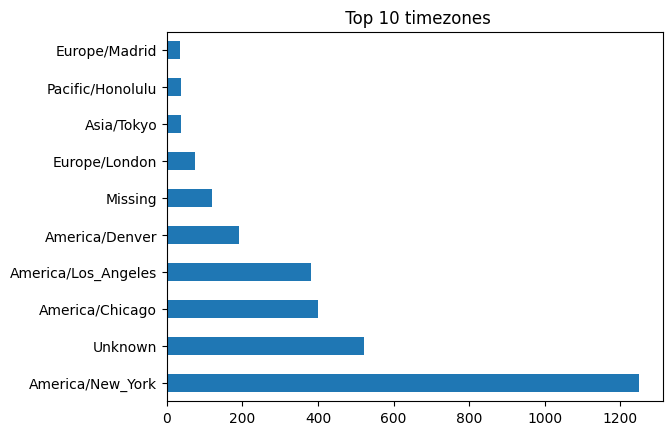

In [111]:
# Horizontal barplot
tz_counts[:10].plot(kind ='barh', rot =0, title =' Top 10 timezones')

In [112]:
# Contents of field 'a'
frame['a'][1]

'GoogleMaps/RochesterNY'

In [113]:
frame['a'][52]

'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

Field 'a' contains information about the browser,device or application to perform the URL sortening

In [115]:
# Parsing the data

'''
Split off the first token in the string (in this case it corresponds to the browser capability)
and make another summary of the user behavior.

'''

results = pd.Series([x.split()[0] for x in frame.a.dropna()])

Code Explanation:<br>
The code creates a pandas Series named 'results'. This series is generated by splitting each non-null value in the column 'a' pf the DataFrame 'frame; by whitespace and taking the first part of the split.<br>

**frame.a.dropna()** - it selects the 'a' column and drops any rows where the value of this column is null (NaN)<br>

**[x.split()[0] for x in frame.a.dropna()]** - this a list comprehension that iterates over each non-null value in the 'a' colmn. For each value 'x' it splits the string by whitespace using 'split()' and takes the first part(index 0) of the resulting list. this creates a list of strings<br>

**pd.Series...** - it converts the list of strings obtained from the list comprehension into a pandas Series.<br>

In summary, 'results' is a Pandas Series containg the first part of each non-null value in the 'a' column of the DataFrame 'frame' after splitting by whitespace


In [116]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [119]:
#Value counts for the first 10 entries of 'a' (agent) column
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

#### Decompose the top timezones into Windows and non-Windows users

In [120]:
# Decompose the top  timezones into Windows and non-Windows users

'''
A user is on Windows if the string 'Windows' is in the agent string.
Since some of the agents are missing, they will excluded from the data

'''
cframe = frame[frame.a.notnull()]

In [131]:
# Compute a value whether each row is Windows or not


# 'cframe' is the DataFrame containing a column 'a' representing user agents
operating_system = pd.Series(np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows'))


In [133]:
operating_system[:10]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
5        Windows
6        Windows
7        Windows
8    Not Windows
9        Windows
dtype: object

In [134]:
# group the data by its timeszone column and tis new list of operating systems
by_tz_os = cframe.groupby(['tz',operating_system])

In [135]:
'''
The group counts, analogous to the value_counts function, can be computed using size.
This result is then reshaped with unstack

'''

agg_counts = by_tz_os.size().unstack().fillna(0)

In [136]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,180.0,316.0
Africa/Cairo,1.0,2.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,1.0,1.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,1.0,0.0
America/Anchorage,0.0,4.0
America/Argentina/Buenos_Aires,0.0,1.0
America/Argentina/Cordoba,1.0,0.0


In [138]:
# Select the top overall time zones

'''
Construct an indirect index array from the row counts in agg_counts in order to select the 
top overall time zones

'''

#Use sort in ascending order
indexer =agg_counts.sum(1).argsort()

Explanation:<br>
**agg_counts.sum(1)** - calculates the sum of counts across each row in the datframe 'agg_counts'. The paramater '1' indicates that the sum should be counted along the rows(axis 1) <br>

**.argsort()** -returns an array of indices that would sort the elements sum calculates in the step above. The indices will be sorted in ascending order of the sum counts across each row.<br>

In summary, first **agg_counts.sum(1)** computes the sum of counts for each time zone (along each row). then, **.argsort()** sorts there sums in ascending order and returns the indices of the sorted elements. The resulting **indexer** array contains the indices that would sort the timezones on their overall counts.


In [139]:
# Overall top 10 timezones
indexer[:10]

tz
                                  21
Africa/Cairo                      51
Africa/Casablanca                 52
Africa/Ceuta                      36
Africa/Johannesburg               53
Africa/Lusaka                     34
America/Anchorage                 54
America/Argentina/Buenos_Aires    55
America/Argentina/Cordoba         56
America/Argentina/Mendoza         27
dtype: int64

In [142]:
# Use take() to select the rows in that order, then slice off the last 10 rows

count_subset =agg_counts.take(indexer)[-10:]

In [143]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,12.0,21.0
Europe/Madrid,15.0,19.0
Pacific/Honolulu,10.0,25.0
Asia/Tokyo,14.0,23.0
Europe/London,32.0,40.0
America/Denver,56.0,125.0
America/Los_Angeles,122.0,247.0
America/Chicago,131.0,249.0
,180.0,316.0


<Axes: title={'center': 'Top timezones by Windows and non-Windows users'}, ylabel='tz'>

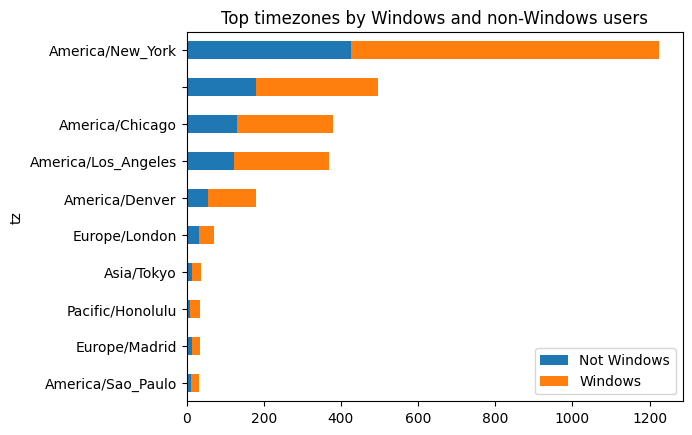

In [144]:
## Barplot
count_subset.plot(kind ='barh', stacked = True, title = 'Top timezones by Windows and non-Windows users' )

<Axes: title={'center': 'Percentage Windows and non-Windows users in top-occurring time zones'}, ylabel='tz'>

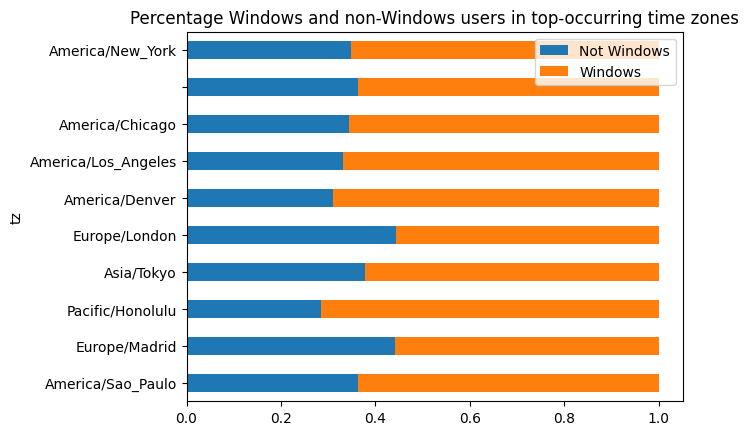

In [145]:
#Percentage Windows and non-Windows users in top-occurring time zones barplot
'''
The plot doesn't make it easy to see the relative percentage of Windows users in the samller groups,
but the rows can easily be normalized to sum to 1 then plotted again

'''

normed_subset = count_subset.div(count_subset.sum(1), axis =0)

#barplot
normed_subset.plot(kind ='barh', stacked=True, title ='Percentage Windows and non-Windows users in top-occurring time zones')


# Example 2: MovieLens 1M Dataset
GroupLens Research provides a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provides, movie ratings, movie metadata(genres and year) and demogragraphic data about the users (age,zip code,gender and occupation). Such data is often of interest in the development of recommendation systems based on machine learning algorithms.<br>

The MovieLens 1M dataset contains 1 million ratings collected from 6000 users on 4000 movies. It's spread across 3 tables: ratings, user information and movie information

### Dataset Description

##### RATINGS FILE DESCRIPTION

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings


##### USERS FILE DESCRIPTION

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"


##### MOVIES FILE DESCRIPTION

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist


In [12]:
import pandas as pd


In [46]:
# Importing files

#File paths
file_path_movies = 'Datasets/movielens/movies.dat'
file_path_ratings = 'Datasets/movielens/ratings.dat'
file_path_users = 'Datasets/movielens/users.dat'

#Converting the *.dat files into pandas dataframe
#Movies
#Defining the columns
mnames =['MovieID','Title','Genres']
movies =pd.read_csv(file_path_movies, sep ='::',engine ='python', header =None, names =mnames)

#Ratings
rnames =['UserID','MovieID','Rating','TimeStamp']   
ratings = pd.read_csv(file_path_ratings, sep ='::',engine ='python',header =None, names=rnames)

#users
unames =['UserID','Gender','Age','Occupation','Zip']
users = pd.read_csv(file_path_users, sep ='::',engine ='python',header =None, names=unames)


Code Explanation:<br>
The **header=None** argument indicates that the file doesn't contain column names in the first row, so you need to provide column_names explicitly. The **engine='python'** is used to suppress the warning generated due to the Python parsing engine when dealing with non-standard delimiters.

In [19]:
movies[:5]

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
#Using Python's slice syntax to view the first 5 entries
ratings[:5]

,UserID,MovieID,Rating,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [27]:
users.head(5)

,UserID,Gender,Age,Occupation,Zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
